<center> <h2> Deployment Model </h2> </center>

**NOTE** : This deployment phase strongly ressembles what has been learn throughout the UDACITY Course

In [13]:
import warnings
warnings.filterwarnings("ignore")

#### Libraries

In [2]:
import re, os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### I. Data Preparation

In [3]:
def identity(x):
    return x

def tokenizetmp(x):
    return x.split()

with open('./data/benchmark_artifacts.pickle', 'rb') as handle:
    benchmark = pickle.load(handle)

In [4]:
benchmark.keys()

dict_keys(['indtrain', 'indval', 'indtest', 'tfidf-estimator', 'vocabulary'])

In [5]:
indtrain = benchmark['indtrain']
indval   = benchmark['indval']
indtest  = benchmark['indtest']

In [6]:
tfidf = benchmark['tfidf-estimator']

In [7]:
data = pd.read_csv('./data/cleandata/data.csv')

In [8]:
train = data.loc[indtrain].copy()
validation = data.loc[indval].copy()
test = data.loc[indtest].copy()
data = None

In [9]:
x_train = tfidf.transform(train['processed']).toarray().astype('float32')
y_train = np.array([(x=='True')*1 for x in train['label']]).astype('float32')

x_val = tfidf.transform(validation['processed']).toarray().astype('float32')
y_val = np.array([(x=='True')*1 for x in validation['label']]).astype('float32')

x_test = tfidf.transform(test['processed']).toarray().astype('float32')
y_test = np.array([(x=='True')*1 for x in test['label']]).astype('float32')

In [10]:
train = test = validation = None

### II. Linear Instance Model

Sometimes, a simple model is enough :)

#### TRAINING

In [11]:
import boto3
import sagemaker
from sagemaker import get_execution_role

In [12]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sagemaker_session.default_bucket()

In [16]:
from sagemaker import LinearLearner

# specify an output path
prefix = 'finalproject'
output_path = 's3://{}/{}'.format(bucket, prefix)

# instantiate LinearLearner
linear = LinearLearner(role=role,
                       train_instance_count=1, 
                       train_instance_type='ml.c4.xlarge',
                       predictor_type='binary_classifier',
                       output_path=output_path,
                       sagemaker_session=sagemaker_session,
                       epochs=25)

In [17]:
formatted_train_data = linear.record_set(x_train, labels=y_train)

In [18]:
%%time
linear.fit(formatted_train_data)

2020-05-24 07:28:15 Starting - Starting the training job...
2020-05-24 07:28:17 Starting - Launching requested ML instances.........
2020-05-24 07:29:47 Starting - Preparing the instances for training...
2020-05-24 07:30:33 Downloading - Downloading input data......
2020-05-24 07:31:38 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[05/24/2020 07:31:41 INFO 140048374765376] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'in

[2020-05-24 07:31:51.554] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 7, "duration": 2734, "num_examples": 36, "num_bytes": 720227736}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.022496158954075404, "sum": 0.022496158954075404, "min": 0.022496158954075404}}, "EndTime": 1590305511.554279, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 2}, "StartTime": 1590305511.554209}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.024204464258466448, "sum": 0.024204464258466448, "min": 0.024204464258466448}}, "EndTime": 1590305511.554377, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 2}, "StartTime": 1590305511.554362}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0233135447910

[2020-05-24 07:32:02.341] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 15, "duration": 2660, "num_examples": 36, "num_bytes": 720227736}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0074274379866463795, "sum": 0.0074274379866463795, "min": 0.0074274379866463795}}, "EndTime": 1590305522.341716, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 1590305522.341613}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.007274248749869211, "sum": 0.007274248749869211, "min": 0.007274248749869211}}, "EndTime": 1590305522.341813, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 1590305522.341792}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.007539444

[2020-05-24 07:32:13.204] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 23, "duration": 2738, "num_examples": 36, "num_bytes": 720227736}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004408295897075108, "sum": 0.004408295897075108, "min": 0.004408295897075108}}, "EndTime": 1590305533.204213, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 10}, "StartTime": 1590305533.204113}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004019643129621233, "sum": 0.004019643129621233, "min": 0.004019643129621233}}, "EndTime": 1590305533.204311, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 10}, "StartTime": 1590305533.204291}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0044544758

[2020-05-24 07:32:23.862] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 31, "duration": 2691, "num_examples": 36, "num_bytes": 720227736}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.003167816209793091, "sum": 0.003167816209793091, "min": 0.003167816209793091}}, "EndTime": 1590305543.863108, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 14}, "StartTime": 1590305543.863009}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.002719208948952811, "sum": 0.002719208948952811, "min": 0.002719208948952811}}, "EndTime": 1590305543.863192, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 14}, "StartTime": 1590305543.863174}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0032000654

[2020-05-24 07:32:34.495] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 39, "duration": 2573, "num_examples": 36, "num_bytes": 720227736}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00250423481123788, "sum": 0.00250423481123788, "min": 0.00250423481123788}}, "EndTime": 1590305554.49538, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 18}, "StartTime": 1590305554.495289}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.002039918201310294, "sum": 0.002039918201310294, "min": 0.002039918201310294}}, "EndTime": 1590305554.495467, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 18}, "StartTime": 1590305554.495452}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00252921126910

[2020-05-24 07:32:45.235] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 47, "duration": 2657, "num_examples": 36, "num_bytes": 720227736}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0020980897392545426, "sum": 0.0020980897392545426, "min": 0.0020980897392545426}}, "EndTime": 1590305565.235616, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 22}, "StartTime": 1590305565.235521}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0016329676628112793, "sum": 0.0016329676628112793, "min": 0.0016329676628112793}}, "EndTime": 1590305565.2357, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 22}, "StartTime": 1590305565.235686}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.002118


2020-05-24 07:33:02 Uploading - Uploading generated training model
2020-05-24 07:33:02 Completed - Training job completed
Training seconds: 149
Billable seconds: 149
CPU times: user 743 ms, sys: 47.7 ms, total: 791 ms
Wall time: 5min 12s


#### INITIAL DEPLOYMENT AND EVALUATION

In [32]:
%%time
linear_predictor = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

Using already existing model: linear-learner-2020-05-24-07-28-15-540


------------------!CPU times: user 286 ms, sys: 21.7 ms, total: 308 ms
Wall time: 9min 2s


In [40]:
from utils.utils_udacity import evaluate

In [41]:
results_validation = evaluate(linear_predictor, x_val, y_val, verbose=False)

In [42]:
results_validation

{'TP': 2117,
 'FP': 92,
 'FN': 11,
 'TN': 2269,
 'Precision': 0.9583521955636034,
 'Recall': 0.9948308270676691,
 'Accuracy': 0.9770550233905101}

In [55]:
x_test[0,:].shape

(5000,)

In [24]:
results_test = evaluate(linear_predictor, x_test, y_test, verbose=False)

In [25]:
results_test

{'TP': 2092,
 'FP': 121,
 'FN': 10,
 'TN': 2268,
 'Precision': 0.9453230908269318,
 'Recall': 0.9952426260704091,
 'Accuracy': 0.9708305499888666}

In [ ]:
from utils.utils_udacity import delete_endpoint

In [28]:
delete_endpoint(linear_predictor)

Deleted linear-learner-2020-05-24-07-28-15-540


### III. Interpretability : Exploring weights of linear model

In order to extrat the weights, we followed the details provided here : https://forums.aws.amazon.com/message.jspa?messageID=827236

* download the model from s3 bucket and saving it in **./model** and unzip it as below
* load it as mxnet
* get the weights

In [101]:
#!pip install colour

In [7]:
import os
import numpy as np
import pandas as pd 
import mxnet as mx
import seaborn as sns

In [14]:
os.system('tar -zxvf ./model/model.tar.gz --directory ./model')
os.system('unzip ./model/model_algo-1 -d ./model')
mod = mx.module.Module.load("./model/mx-mod", 0)

In [144]:
weights = mod._arg_params['fc0_weight'].asnumpy().flatten()
intercept = mod._arg_params['fc0_bias'].asnumpy().flatten()
vocabulary = np.array(list(tfidf.vocabulary_.keys()))

In [145]:
model = pd.DataFrame()
model['word'] = vocabulary
model['weight'] = weights

In [146]:
amplitude = 15
window = 10 
subdata = model.loc[model['weight'].abs()>amplitude]
subdata = subdata.sort_values('weight')
final = pd.concat([subdata.iloc[:window,:],subdata.iloc[-window:,:]])

In [147]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),20))
colors = [c.rgb for c in colors]

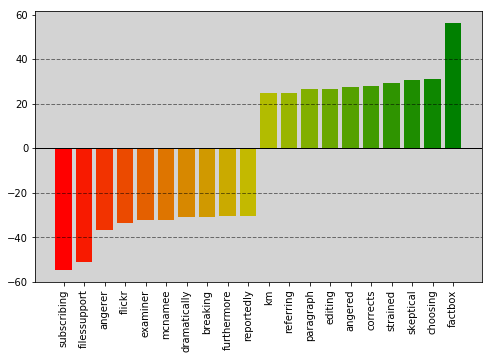

In [148]:
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.rcParams['figure.facecolor'] = 'white'
y_pos = range(len(final['word']))
plt.bar(x=final['word'],height=final['weight'],color=colors)
plt.xticks(y_pos, final['word'], rotation=90)
plt.axhline(0,c='k',lw=1)
plt.axhline(20,c='k',alpha=0.5,lw=1,linestyle='--')
plt.axhline(-20,c='k',alpha=0.5,lw =1,linestyle='--')
plt.axhline(40,c='k',alpha=0.5,lw=1,linestyle='--')
plt.axhline(-40,c='k',alpha=0.5,lw =1,linestyle='--')
plt.savefig('./images/word_importance_interpretation.pdf',bbox_inches='tight')
plt.show()